In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [2]:
final_df = pd.read_csv('final_df.csv') 

In [3]:
final_df.shape

(138614, 97)

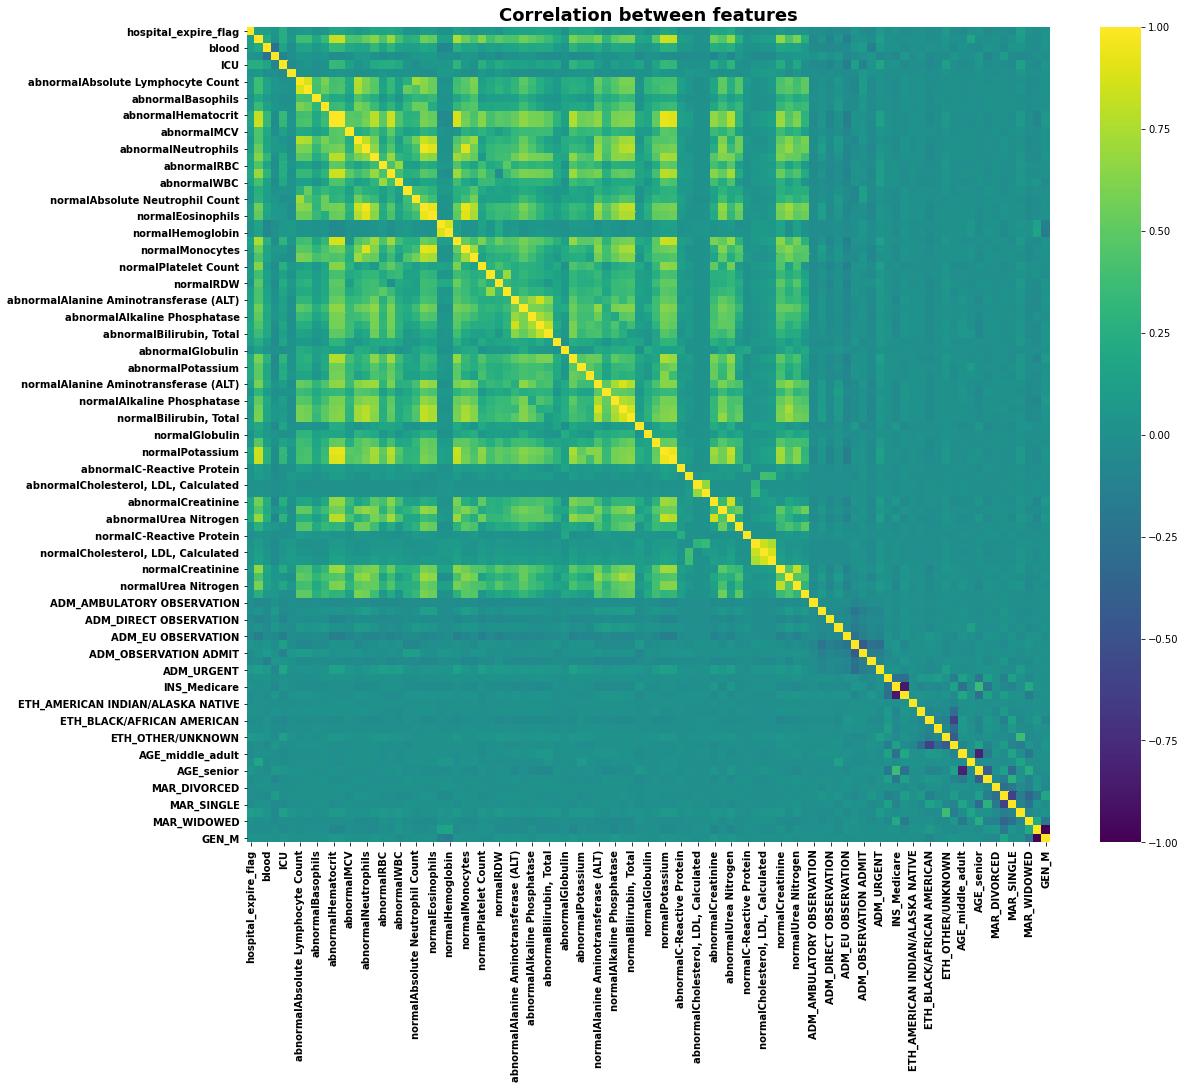

In [4]:
final_df_corr=final_df.corr()
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(final_df_corr, cmap='viridis')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()




In [6]:
final_df_corr["hospital_expire_flag"].sort_values(ascending=False)

hospital_expire_flag               1.000000
ICU                                0.243097
abnormalUrea Nitrogen              0.208702
abnormalPT                         0.206729
abnormalSodium                     0.197733
                                     ...   
ADM_DIRECT OBSERVATION            -0.031670
AGE_young_adult                   -0.035192
MAR_SINGLE                        -0.036061
ADM_SURGICAL SAME DAY ADMISSION   -0.045828
ADM_EU OBSERVATION                -0.051840
Name: hospital_expire_flag, Length: 97, dtype: float64

In [7]:
# Target Variable (Length-of-Stay)
Survival = final_df['hospital_expire_flag'].values
print(Survival)
# Prediction Features
features = final_df.drop(columns=['hospital_expire_flag'])
print(features.shape)
features.info()

[0. 0. 0. ... 0. 0. 0.]
(138614, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138614 entries, 0 to 138613
Data columns (total 96 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   LOS                                      138614 non-null  float64
 1   blood                                    138614 non-null  float64
 2   neoplasms                                138614 non-null  float64
 3   ICU                                      138614 non-null  float64
 4   Neuro_ICU                                138614 non-null  float64
 5   abnormalAbsolute Lymphocyte Count        138614 non-null  float64
 6   abnormalAbsolute Neutrophil Count        138614 non-null  float64
 7   abnormalBasophils                        138614 non-null  float64
 8   abnormalEosinophils                      138614 non-null  float64
 9   abnormalHematocrit                       138614 non-null  float64


In [8]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    Survival, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

print("Training set has {} samples.".format(y_train.shape[0]))
print("Testing set has {} samples.".format(y_test.shape[0]))


Training set has 110891 samples.
Testing set has 27723 samples.
Training set has 110891 samples.
Testing set has 27723 samples.


In [9]:
# Logistic Regression

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
y_test_preds1 = log_reg.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test_preds1,y_test))

The accuracy of the Logistic Regression is 0.9611874616744219


In [12]:
# Decision Tree

In [13]:
tree_mod = DecisionTreeClassifier(random_state=42)
tree_mod.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
y_test_preds2=tree_mod.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_test_preds2,y_test))

The accuracy of the Decision Tree is 0.9463982974425568


In [15]:
# Radial Support Vector Machines(rbf-SVM)

In [16]:

# rbf_svm = svm.SVC(kernel='rbf',C=1,gamma=0.1)
# rbf_svm.fit(X_train,y_train) 
# y_test_preds3 = rbf_svm.predict(X_test)
# print('Accuracy for rbf SVM is ',metrics.accuracy_score(y_test_preds3,y_test))

In [17]:
# Accuracy for rbf SVM is  0.9645518101552499

In [18]:
# Linear Support Vector Machine(linear-SVM)

In [19]:
# lin_svm=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
# lin_svm.fit(X_train,y_train)
# y_test_preds4 = lin_svm.predict(X_test)
# print('Accuracy for linear SVM is',metrics.accuracy_score(y_test_preds4,y_test))

In [20]:
# K-Nearest Neighbours(KNN)

In [21]:
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train,y_train)
y_test_preds5 = knn_model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(y_test_preds5,y_test))

The accuracy of the KNN is 0.9630631605526098


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


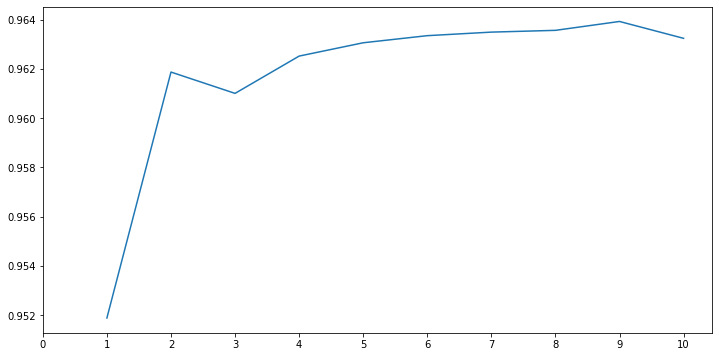

Accuracies for different values of n are: [0.95188111 0.96187281 0.96100711 0.96252209 0.96306316 0.96335173
 0.96349601 0.96356816 0.96392887 0.96324352] with the max value as  0.9639288677271579


In [22]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    knn_model=KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train,y_train)
    prediction=knn_model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [23]:
# Gaussian Naive Bayes

In [24]:
GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)
y_test_preds5 = GNB_model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(y_test_preds5,y_test))

The accuracy of the NaiveBayes is 0.8939508711178444


In [25]:
# Random Forests

In [26]:
Rf_model =RandomForestClassifier(n_estimators=100, random_state=42 )
Rf_model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [27]:
y_test_preds6 = Rf_model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(y_test, y_test_preds6))

The accuracy of the Random Forests is 0.9665259892508026


In [39]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=42, shuffle=True) # k=5, split the data into 10 equal parts

xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(random_state=42),GaussianNB(),RandomForestClassifier(n_estimators=100, random_state=42)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

,CV Mean,Std
Logistic Regression,0.962837,0.000820
KNN,0.963901,0.000834
Decision Tree,0.946668,0.000866
Naive Bayes,0.895402,0.003758
Random Forest,0.966922,0.000709


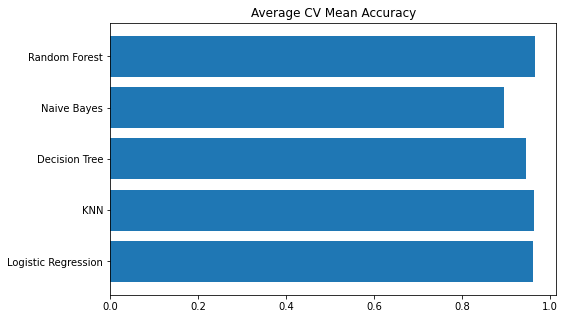

In [40]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

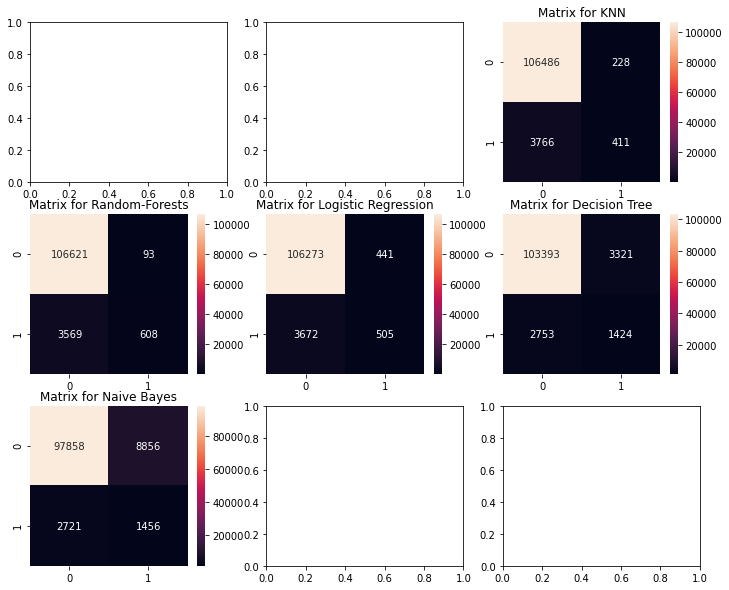

In [41]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=7),X_train,y_train,cv=5)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100,random_state=42 ),X_train,y_train,cv=5)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X_train,y_train,cv=5)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(random_state=42),X_train,y_train,cv=5)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X_train,y_train,cv=5)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


##### Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for random forest:

1)The no. of correct predictions are 106621(for survived)(True Positives) + 608(for expired)(True negatives) with the mean CV accuracy being (106,621+608)/110,891 = 0.9669(96.7%) which we did get earlier. 

2)Errors--> The remaining 93 were wrongly classified as survived (false positives, type I error) and 3569 patients were wrongly classified as dead (false negatives, type II error)

By looking at all the matrices, we can say that random forest has a higher chance in correctly predicting the survival but NaiveBayes has a higher chance in correctly predicting patients who are dead.

In [43]:
# Hyper-Parameters Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
# n_estimators=range (100,1000,100)
n_estimators=[900,1000]
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=hyper,verbose=True)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.9669855979719133
RandomForestClassifier(n_estimators=900, random_state=42)


#### The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier. Precision is typically used along with another metric named recall, also called sensitivity or the true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier. 
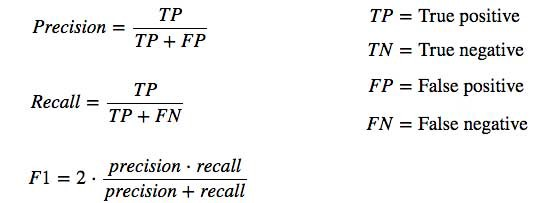

In [52]:
y_pred_rf = cross_val_predict(RandomForestClassifier(n_estimators=900,random_state=42 ),X_train,y_train,cv=5)

In [57]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_pred_rf) # ==  106621/ (106621 + 93)



0.8944954128440367

In [58]:
# random forest has a precision of 0.0.89 —in other words, when it predicts a patient is alive , it is correct 89% of the time.

In [62]:
recall_score(y_train, y_pred_rf) # == 106621/ (106621 + 3569)


0.14005266937993777

In [60]:
# the model has a recall of 0.14 —in other words, it correctly identifies 14% of all the patients who survived.

In [63]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred_rf)


0.24218588283999176

#### It is often convenient to combine precision and recall into a single metric called the F score, in particular if you need a simple way to compare two classifiers. The F score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F score if both recall and precision are high.

#### The F score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.